In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.datasets import mnist

import warnings
warnings.filterwarnings('ignore')

In [2]:
(x_train, y_actual_train),(x_test, y_actual_test) = mnist.load_data()

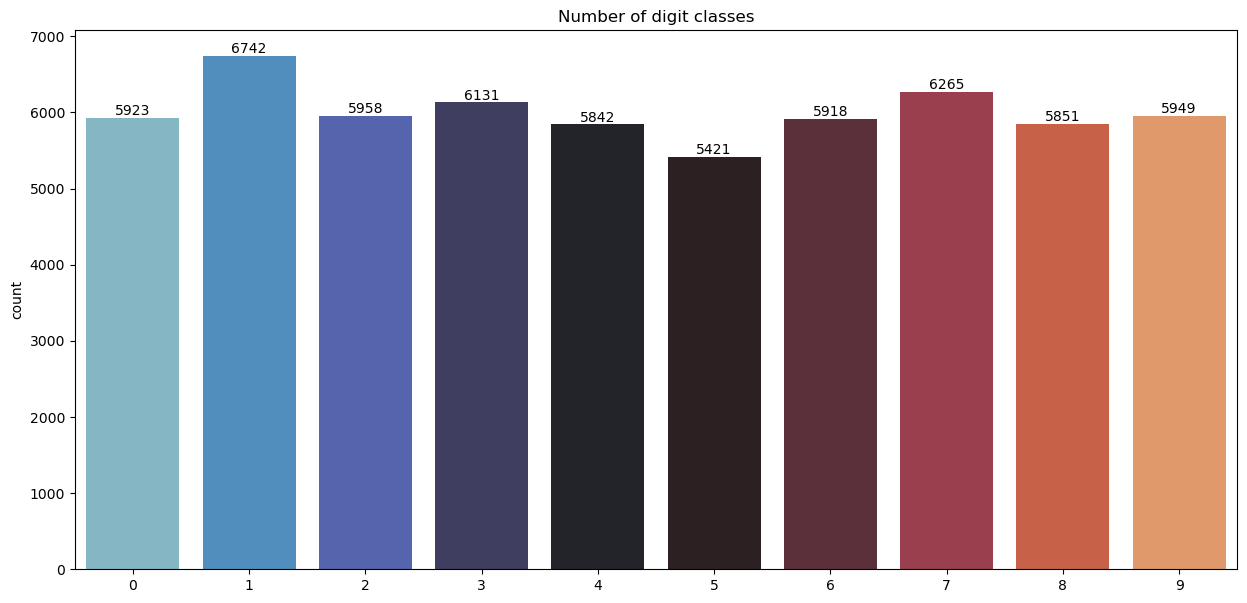

In [3]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
ax = sns.countplot(y_actual_train, palette="icefire")
ax.bar_label(ax.containers[0])
plt.title("Number of digit classes")
plt.show()

In [4]:
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)


In [5]:
print("y_train shape: ",y_actual_train.shape)
print("y_test shape: ",y_actual_test.shape)

y_train shape:  (60000,)
y_test shape:  (10000,)


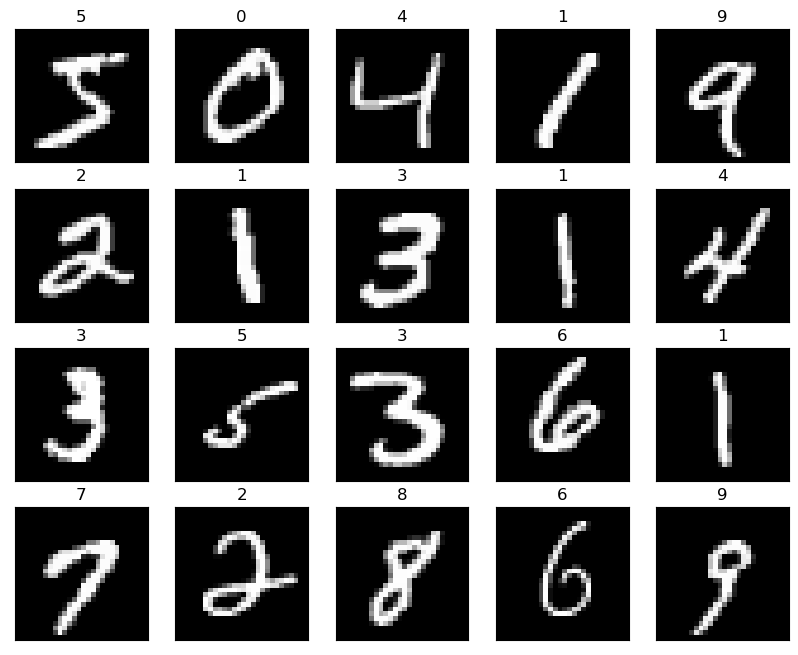

In [6]:
class_names = [0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)), cmap='gray')
    label_index = int(y_actual_train[i])
    plt.title(class_names[label_index])
plt.show()

In [7]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)

x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)


In [8]:
# One Hot Encoding 
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_actual_train, num_classes = 10)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=777)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop 

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 256)               8

In [12]:
model.compile(loss ='categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [13]:
history = model.fit(x_train,y_train,
                    batch_size=128,epochs=20,verbose=1,
                    validation_data=(x_val,y_val))

Epoch 1/20
422/422 [==============================] - 19s 43ms/step - loss: 0.1813 - accuracy: 0.9473 - val_loss: 0.0656 - val_accuracy: 0.9802
Epoch 2/20
422/422 [==============================] - 19s 45ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.0704 - val_accuracy: 0.9778
Epoch 3/20
422/422 [==============================] - 19s 44ms/step - loss: 0.0345 - accuracy: 0.9896 - val_loss: 0.0499 - val_accuracy: 0.9847
Epoch 4/20
422/422 [==============================] - 19s 44ms/step - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.0327 - val_accuracy: 0.9895
Epoch 5/20
422/422 [==============================] - 19s 44ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.0380 - val_accuracy: 0.9887
Epoch 6/20
422/422 [==============================] - 19s 44ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.0439 - val_accuracy: 0.9885
Epoch 7/20
422/422 [==============================] - 19s 45ms/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 0.0434 - val_accuracy:

In [14]:
# One Hot Encoding 
y_test = to_categorical(y_actual_test, num_classes = 10)

# Evaluating Testing Data
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.0371 - accuracy: 0.9921
Test loss: 0.03712543472647667
Test accuracy: 0.9921000003814697


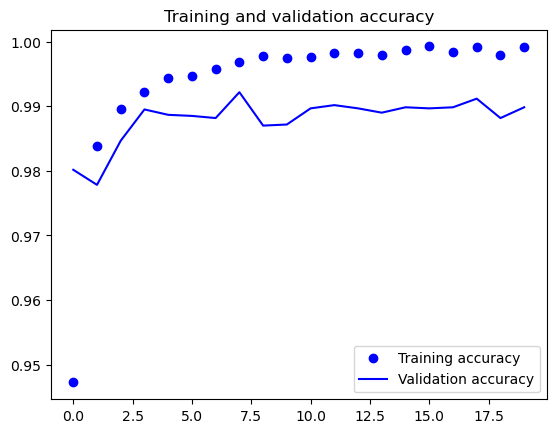

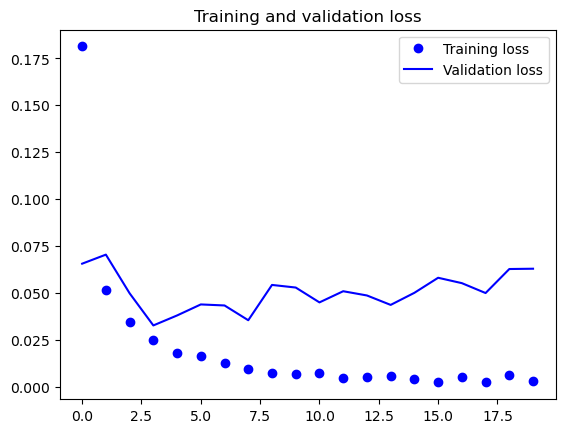

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


313/313 [==============================] - 1s 5ms/step


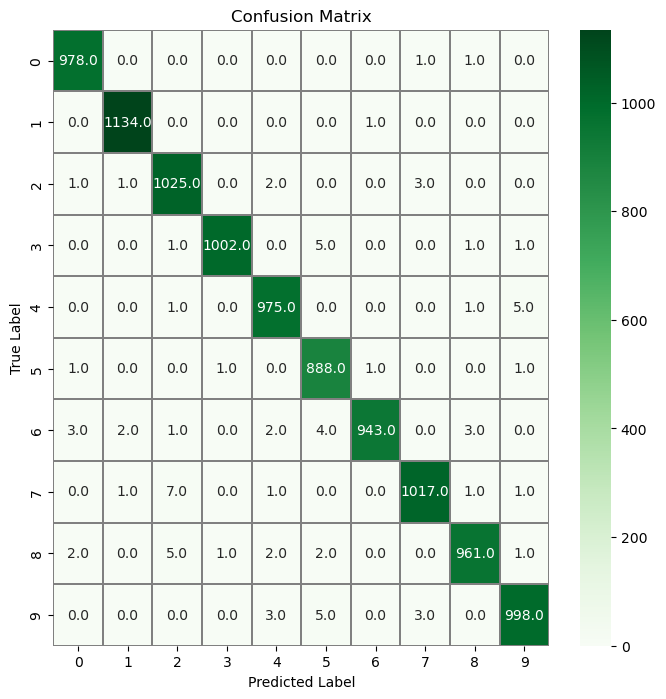

In [16]:
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Comparing Predicted vs Actual Labels

### 1. Correct Labels 

In [19]:
class_names = [0,1,2,3,4,5,6,7,8,9]
correct = []

for i in range(len(y_test)):
    if(y_pred_classes[i] == y_true[i]):
        correct.append(i)
    if(len(correct) == 4):
        break

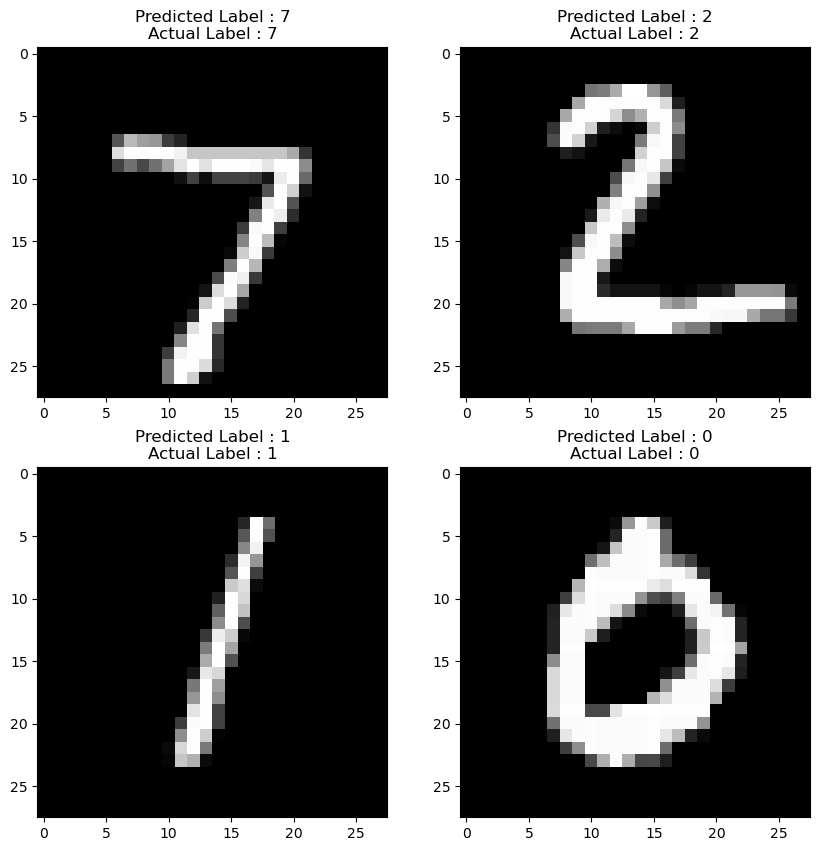

In [21]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[correct[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(class_names[y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " + 
                 str(class_names[y_true[correct[0]]]))
ax[0,1].imshow(x_test[correct[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(class_names[y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " + 
                 str(class_names[y_true[correct[1]]]))
ax[1,0].imshow(x_test[correct[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(class_names[y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " + 
                 str(class_names[y_true[correct[2]]]))
ax[1,1].imshow(x_test[correct[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(class_names[y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " + 
                 str(class_names[y_true[correct[3]]]))
plt.show()

### 2. Incorrect Labels 

In [22]:
incorrect = []
for i in range(len(y_test)):
    if(not y_pred_classes[i] == y_true[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break

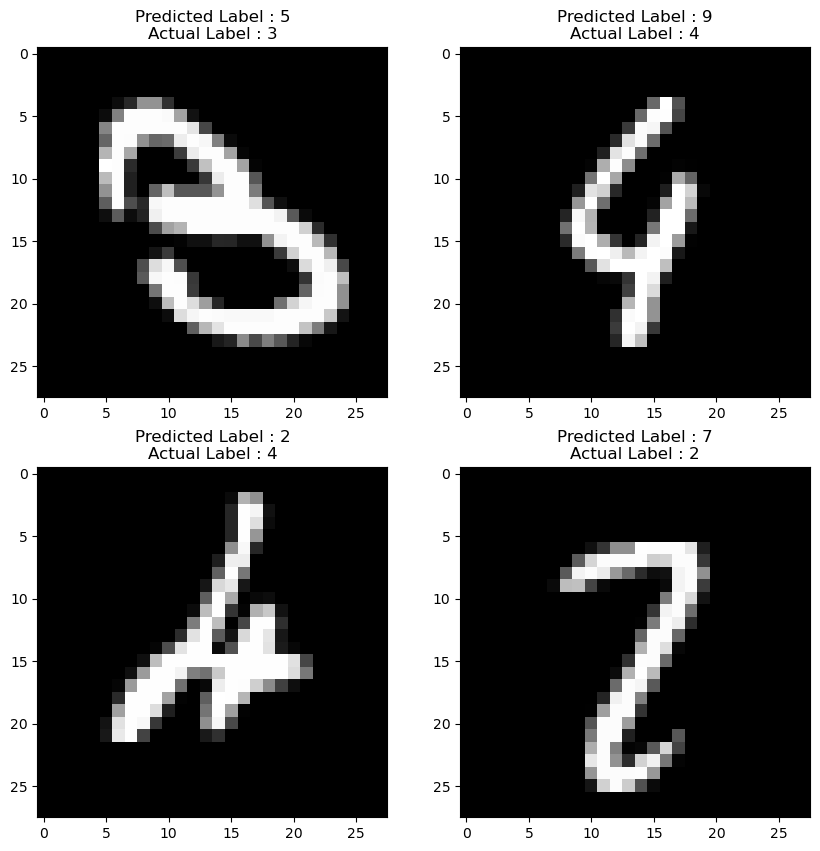

In [23]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[incorrect[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(class_names[y_pred_classes[incorrect[0]]]) + "\n"+"Actual Label : " + 
                 str(class_names[y_true[incorrect[0]]]))
ax[0,1].imshow(x_test[incorrect[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(class_names[y_pred_classes[incorrect[1]]]) + "\n"+"Actual Label : " + 
                 str(class_names[y_true[incorrect[1]]]))
ax[1,0].imshow(x_test[incorrect[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(class_names[y_pred_classes[incorrect[2]]]) + "\n"+"Actual Label : " + 
                 str(class_names[y_true[incorrect[2]]]))
ax[1,1].imshow(x_test[incorrect[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(class_names[y_pred_classes[incorrect[3]]]) + "\n"+"Actual Label : " + 
                 str(class_names[y_true[incorrect[3]]]))

plt.show()

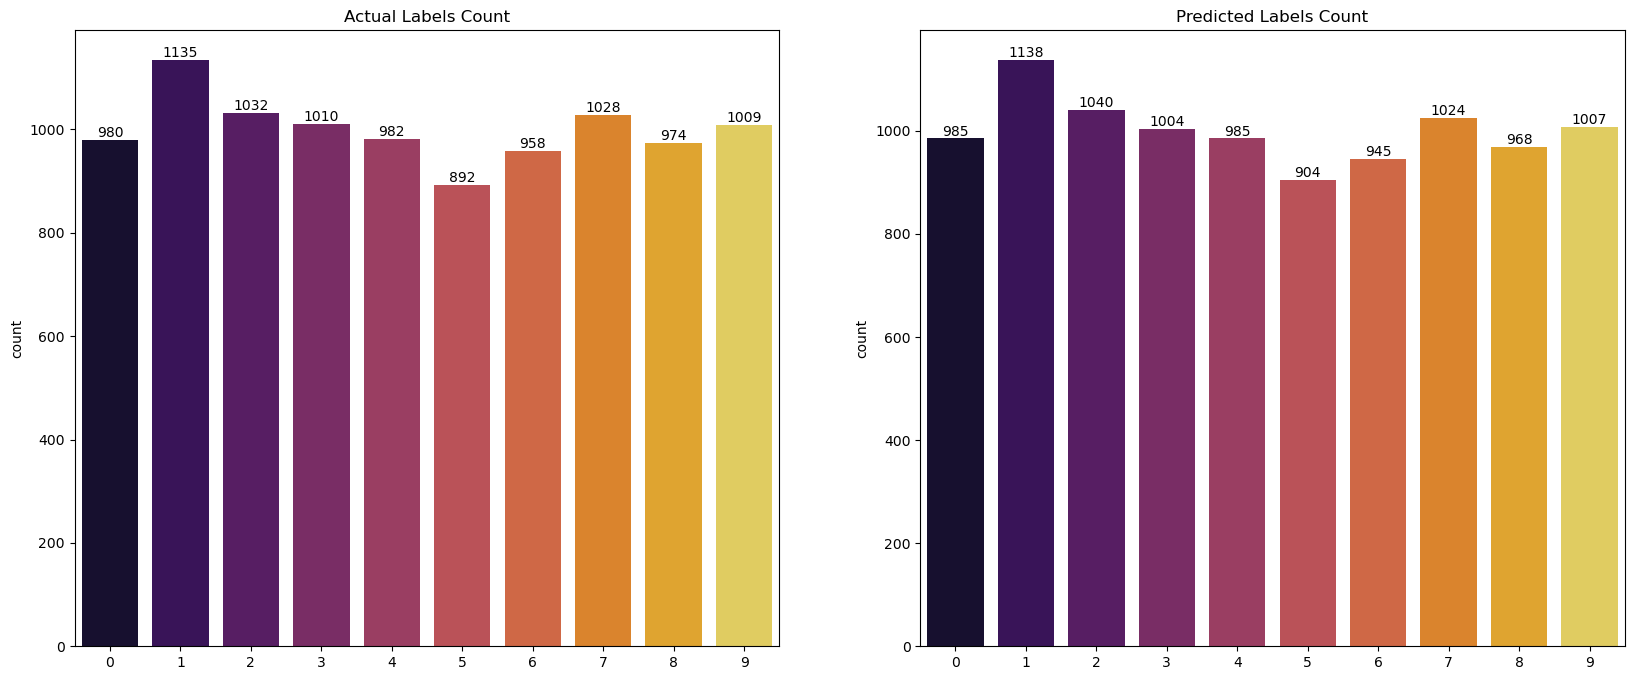

In [29]:
fig, ax = plt.subplots(1,2 ,figsize=(20,8))
sns.countplot(y_actual_test, palette='inferno', ax = ax[0]).set_title("Actual Labels Count")
sns.countplot(y_pred_classes, palette="inferno", ax = ax[1]).set_title("Predicted Labels Count")
for i in range(0,2):
    for container in ax[i].containers:
        ax[i].bar_label(container)
plt.show()